In [124]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor

In [125]:
# Disable warnings
import warnings

warnings.filterwarnings('ignore')

In [126]:
class CONFIG:
    FILE = "Portuguese.xlsx"
    PRINT = False

读取数据文件，数据文件有 33 列，652 行

In [127]:
# 读取数据文件
df = pd.read_excel(CONFIG.FILE)

特征工程:

- 数据预处理
    - 特征构造
        - StandardScaler
        - MinMaxScaler
        - OneHotEncoder
        - PCA
    - 特征选择
        - 过滤式方法
            - SelectKbest
            - SelectPercentile
            - GenericUnivariateSelect
            - VarianceThreshold
        - 包装式方法
            - RFE
            - RFECV
        - 嵌入式方法
            - LinearSVC
            - SelectFromModel
    - 数据清洗
        - 缺失值处理
            - SimpleImputer
            - IterativeImputer
        - 异常值处理
            - RobustScaler
        - 数据类型转换

In [128]:
# 特征构造
# OneHotEncoder
TransformColumnNames = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian',
                        'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
for name in TransformColumnNames:
    le = LabelEncoder()
    df[name] = le.fit_transform(df[name])

In [129]:
# 分割数据
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [136]:
# 特征选择 卡方检验
def multi_selector(k, if_print=CONFIG.PRINT):
    selector = SelectKBest(chi2, k=k)
    selector.fit(X_train, y_train)
    chi2_value, p_value = chi2(X_train, y_train)
    if if_print:
        selected_names = X.columns[selector.get_support()]
        print(selected_names)
        print(f"names \t chi2_value \tp_value")
        for i in range(len(chi2_value)):
            print(f"{df.columns.values[i]} \t {chi2_value[i]} \t {p_value[i]}")
    return selector.transform(X_train), selector.transform(X_test)

模型构建预测:

- 线性回归
- 决策树
- 随机森林
- 神经网络

In [131]:
regressors = [('LinearRegression', LinearRegression()), ('DecisionTreeRegressor', DecisionTreeRegressor()),
              ('MLPRegressor', MLPRegressor()),
              ('RandomForestRegressor', RandomForestRegressor())]


def multi_regressors(if_print=CONFIG.PRINT):
    """Multiple regressors
    print the MSE using LinearRegression DecisionTreeRegressor MLPRegressor and RandomForestRegressor
    :return: 
    """
    regressor_mse = []
    for regression_name, regressor in regressors:
        model = regressor
        model.fit(X_train_selected, y_train)
        y_pred = model.predict(X_test_selected)

        # MSE
        mse = mean_squared_error(y_test, y_pred)
        if if_print:
            print(regression_name, 'MSE:', mse)
        regressor_mse.append(mse)
    return regressor_mse

优化

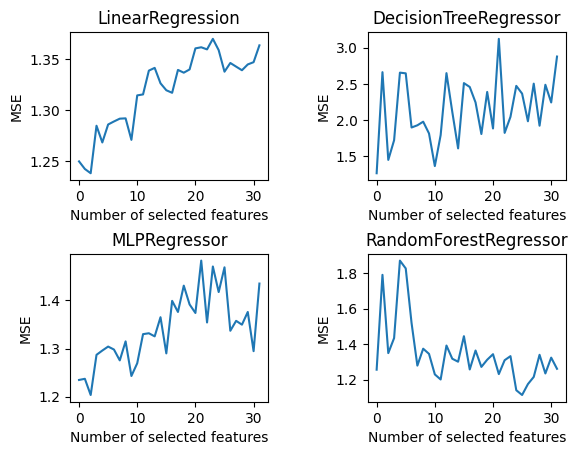

In [132]:
if __name__ == '__main__':
    multi_regressor_mse = []
    min_selector_mse = []
    min_selector_mse_k = []
    for _ in range(1, 33):
        X_train_selected, X_test_selected = multi_selector(_)
        multi_regressor_mse.append(multi_regressors())
    for idx, (regression_name, regressor) in enumerate(regressors):
        multi_mse = [row[idx] for row in multi_regressor_mse]

        # Plot the mse and the number of selected features 
        plt.subplot(2, 2, idx + 1)
        plt.subplots_adjust(hspace=0.5, wspace=0.5)
        plt.plot(multi_mse)
        plt.xlabel('Number of selected features')
        plt.ylabel('MSE')
        plt.title(f"{regression_name}")
    pass

In [137]:
# Try to select 9 features
X_train_selected, X_test_selected = multi_selector(9, if_print=True)
multi_regressors(if_print=True)

Index(['school', 'Medu', 'Fedu', 'Mjob', 'failures', 'Dalc', 'absences', 'G1',
       'G2'],
      dtype='object')
names 	 chi2_value 	p_value
school 	 39.95250591654638 	 0.0007911173023030074
sex 	 11.659169714428376 	 0.7670900315999536
age 	 4.933598144235213 	 0.9960736085941071
address 	 10.607640802720773 	 0.8330319227040678
famsize 	 8.129775137010785 	 0.9449086229302506
Pstatus 	 0.5198501827278437 	 0.9999999995897294
Medu 	 28.335703336853587 	 0.028820023734138285
Fedu 	 25.780960297075225 	 0.057189240801491195
Mjob 	 31.26390410927753 	 0.01244911122925734
Fjob 	 6.008183555744932 	 0.9880068558600709
reason 	 22.947256261225416 	 0.11515176293418031
guardian 	 5.51029792404405 	 0.9925751979867516
traveltime 	 10.263776419003792 	 0.8524949259362745
studytime 	 11.505893679701446 	 0.7772360555472387
failures 	 212.80003113216452 	 2.0252364664390306e-36
schoolsup 	 22.026070640044697 	 0.14235174397253667
famsup 	 7.0454018008428845 	 0.9723760120912888
paid 	 12.0382

[1.292173116125609, 2.032442748091603, 1.3021491776108503, 1.3706035617048347]